In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn keras yfinance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [3]:
df = pd.read_csv("AAON.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

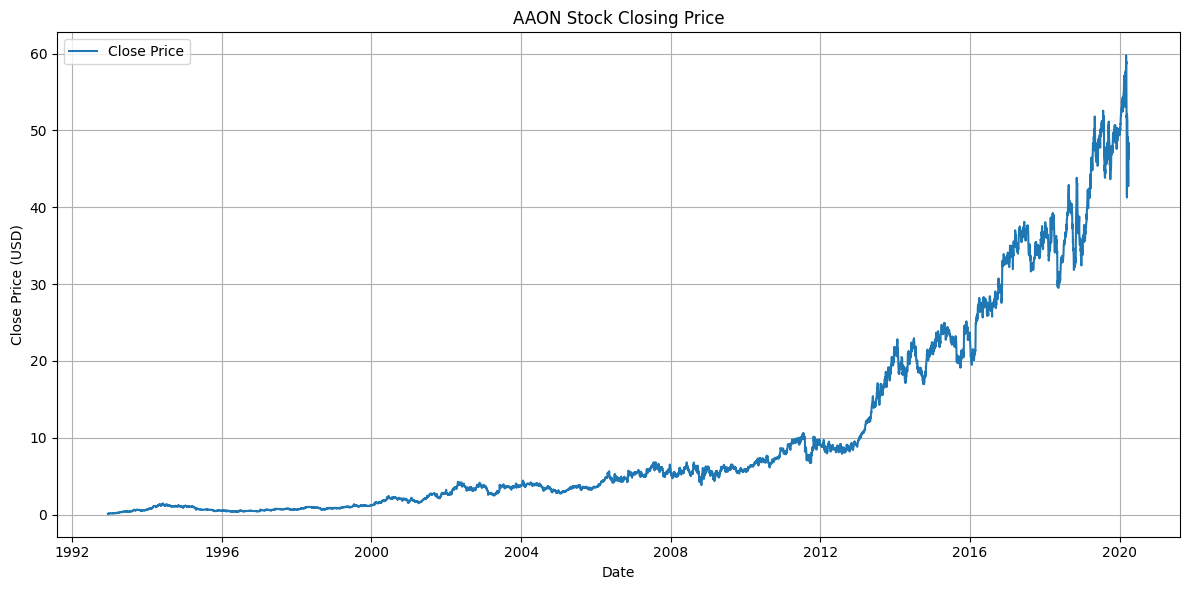

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title("AAON Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
close_data = df[['Close']].values  # Only 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
close_scaled = scaler.fit_transform(close_data)

In [6]:
# Function to create dataset for time series
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(close_scaled, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [7]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - loss: 0.0017 - val_loss: 7.9058e-04
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 1.3067e-04 - val_loss: 0.0040
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 1.2770e-04 - val_loss: 0.0030
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - loss: 7.8909e-05 - val_loss: 7.9369e-04
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 8.3767e-05 - val_loss: 0.0020
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 7.8802e-05 - val_loss: 0.0013
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 7.8940e-05 - val_loss: 8.2272e-04
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 8.7014e-05 - val_loss: 0.0011
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - loss: 7.8382e-05 - val_loss: 9.3665e-04
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 7.2375e-05 - val_loss: 0.0014


In [10]:
y_pred = model.predict(X_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [11]:
# Inverse transform predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

In [12]:
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Root Mean Squared Error (RMSE): 2.2531269483439114
Mean Absolute Error (MAE): 1.7482433305098044


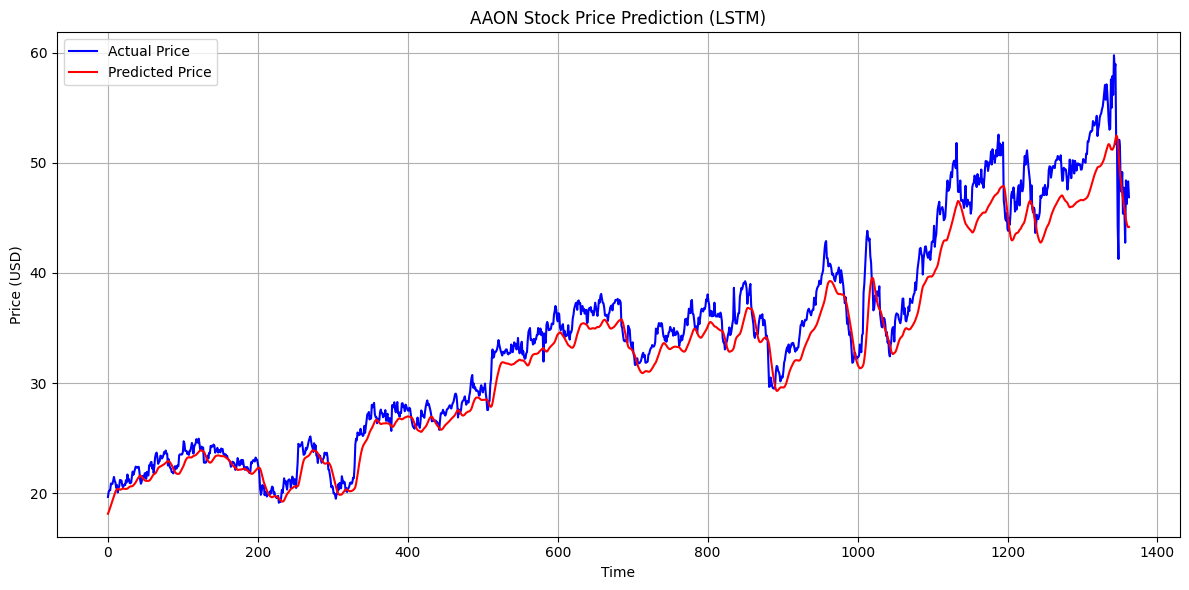

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(y_pred_actual, label='Predicted Price', color='red')
plt.title("AAON Stock Price Prediction (LSTM)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

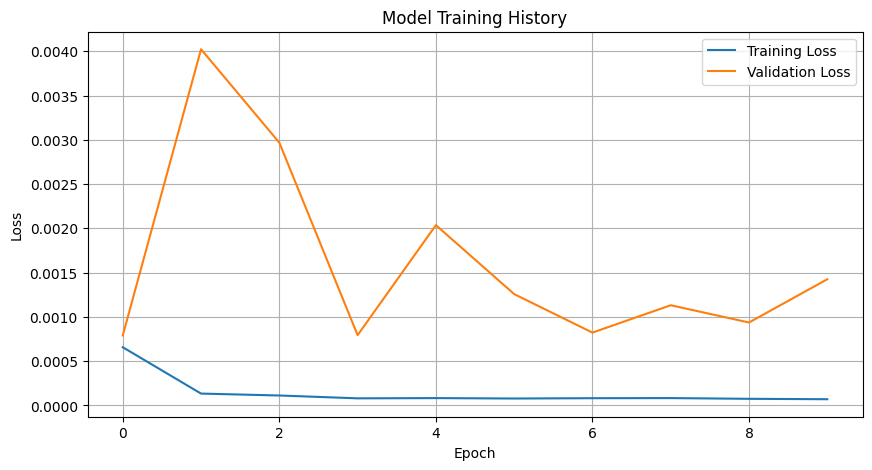

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()